<a href="https://colab.research.google.com/github/taianecbassis/LH_CD_TAIANEDEASSIS/blob/main/LH_CD_TAIANEDEASSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do problema de negócio

---



*Visando o desenvolvimento de sua estratégia de precificação, o objetivo deste projeto foi desenvolver um modelo de previsão de preços, a partir do dataset com dados de aluguéis temporários da cidade de Nova York, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.*


Descrição das entregas a serem realizadas:


* Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

* Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
*O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
* Existe algum padrão no texto do nome do local para lugares de mais alto valor?
* Explique como você faria a previsão do preço a partir dos dados.
* Quais variáveis e/ou suas transformações você utilizou e por quê?
* Qual tipo de problema estamos resolvendo (regressão, classificação)?
* Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
* Qual medida de performance do modelo foi escolhida e por quê?

* Supondo um apartamento com as seguintes características:

    `{'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'price': 225,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355}`



# **PASSO 01**

## Análise exploratória dos dados (EDA)


---



*Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.*








>  **Dicionário de variáveis**

* id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
* nome - Representa o nome do anúncio
* host_id - Representa o id do usuário que hospedou o anúncio
* host_name – Contém o nome do usuário que hospedou o anúncio
* bairro_group - Contém o nome do bairro onde o anúncio está localizado
* bairro - Contém o nome da área onde o anúncio está localizado
* latitude - Contém a latitude do local
* longitude - Contém a longitude do local
* room_type – Contém o tipo de espaço de cada anúncio
* price - Contém o preço por noite em dólares listado pelo anfitrião
* minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
* numero_de_reviews - Contém o número de comentários dados a cada listagem
* ultima_review - Contém a data da última revisão dada à listagem
* reviews_por_mes - Contém o número de avaliações fornecidas por mês
* calculado_host_listings_count - Contém a quantidade de listagem por host
* disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

### *Obetenção dos dados*

In [8]:
# importar o arquivo csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desafio-lighthouse-indicium/teste_indicium_precificacao.csv")
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### *Entendendo o conjunto de dados*

*Identificando a quantidade de entradas que o conjunto de dados possui e verificando os tipos de cada coluna.*

In [11]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 48894
Variáveis:	 16



id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

### *Verificando a porcentagem de valores ausentes*

*A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.*

* *É possível ver que as colunas `ultima_review` e `reviews_por_mes` possuem 20,55% dos seus valores faltantes.*
* As variáveis `host_name` e `nome` posuem menos de 0,1% dos seus valores faltantes.

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

ultima_review                    0.205588
reviews_por_mes                  0.205588
host_name                        0.000430
nome                             0.000327
id                               0.000000
host_id                          0.000000
bairro_group                     0.000000
bairro                           0.000000
latitude                         0.000000
longitude                        0.000000
room_type                        0.000000
price                            0.000000
minimo_noites                    0.000000
numero_de_reviews                0.000000
calculado_host_listings_count    0.000000
disponibilidade_365              0.000000
dtype: float64

### *Vevificando o tipo de distribuição das variáveis*

*Para tal, farei uso da plotagem de histogramas.*

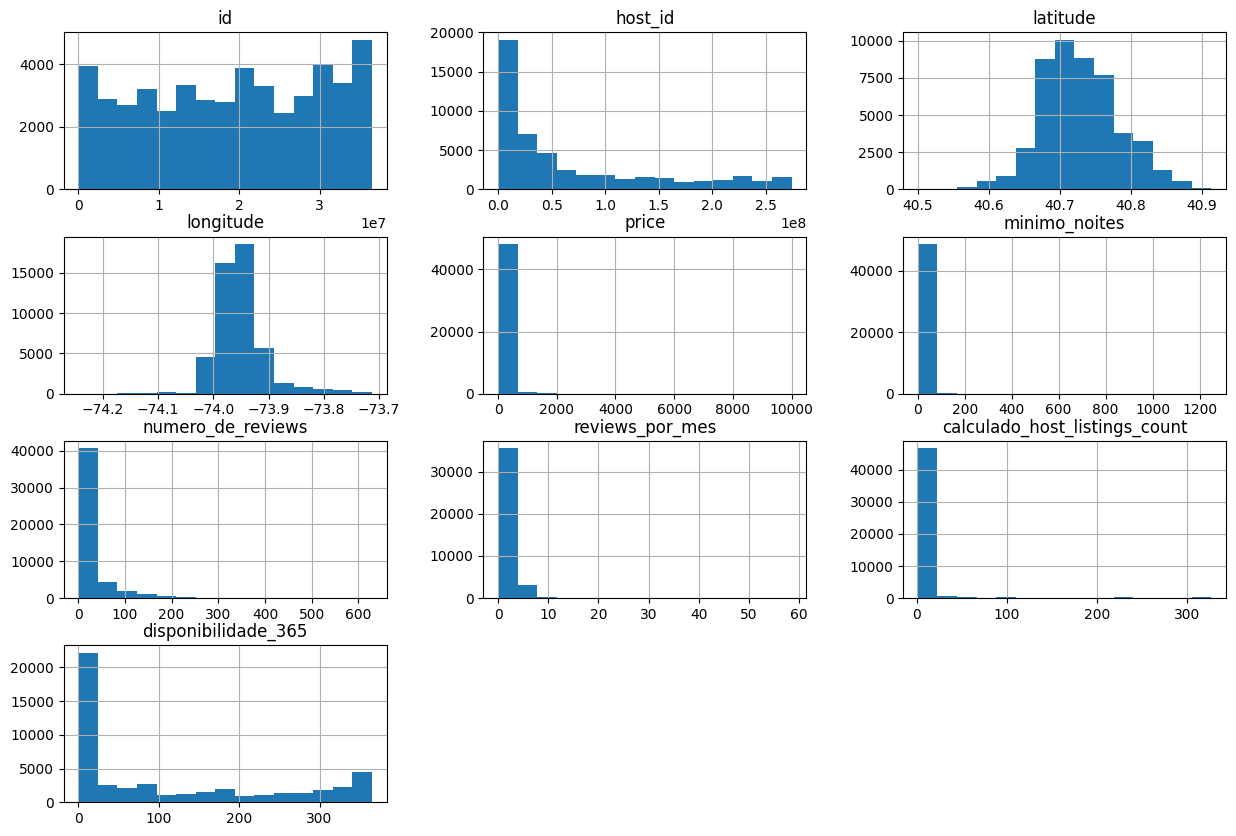

In [13]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### *Verificando a presença de outliers*


A partir da análise dos histogramas é possível verificar indícios da presença de **outliers**. *texto em itálico*

*É possivel notar que as variáveis como `price`, `minimo_noites`, `calculado_host_listings_count`e `reviews_por_mes`, por exemplo, apresentam distorções em suas representações gráficas, pois os valores não seguem uma distribuição normal.*

*Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:*

* *Resumo estatístico por meio do método `describe()`*
* *Plotar `boxplots` para a variável.*

In [15]:
# ver o resumo estatístico das variáveis numéricas importantes
df[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
    'calculado_host_listings_count', 'disponibilidade_365']].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Através do resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 175, porém seu valor máximo é 10.000;
* A variável `minimo_noites` possui 75% do valor abaixo de 5 dias, porém seu valor máximo é 1250 noites;

Assim, é possível concluir que há outliers nos dados, o que pode influenciar futuras análises e modelos preditivos.

#### Boxplot para a variável minimo_noites

Neste caso, para ponto de corte foi considerado outliers valores de `minimi_noite` que estejam acima de 30 noites.

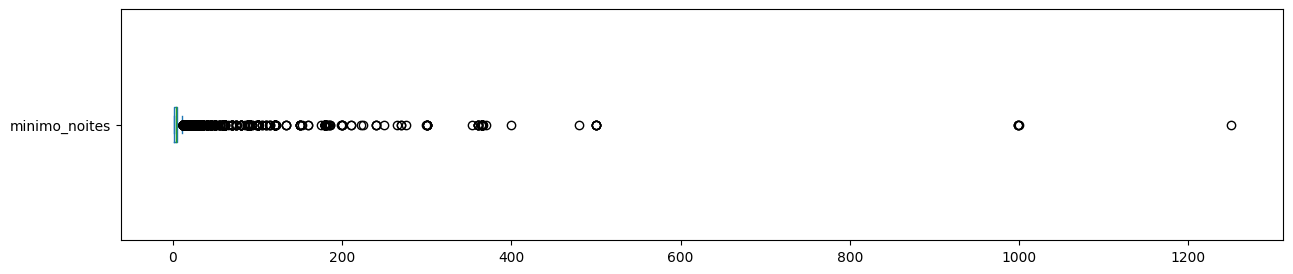

minimo_noites: valores acima de 30:
747 entradas
1.5278%


In [17]:
# minimum_nights
df.minimo_noites.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimo_noites: valores acima de 30:")
print("{} entradas".format(len(df[df.minimo_noites > 30])))
print("{:.4f}%".format((len(df[df.minimo_noites > 30]) / df.shape[0])*100))


#### Boxplot para a variável price

*Neste caso, para ponto de corte foi considerado outliers valores de `price` que estejam acima de 800.*



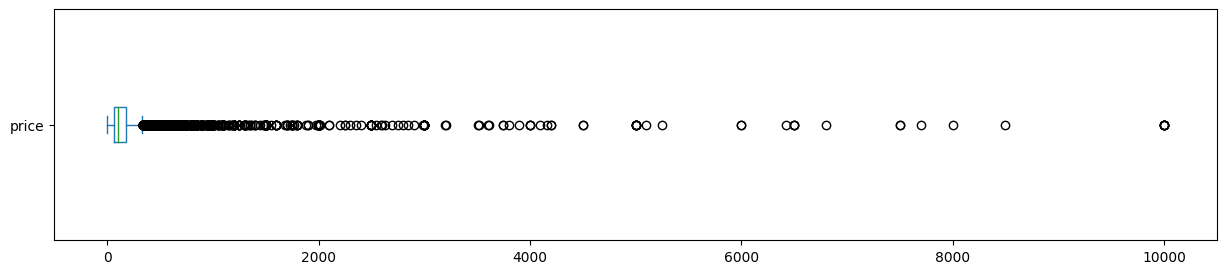


price: valores acima de 900
420 entradas
0.8590%


In [23]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 800 para price
print("\nprice: valores acima de 900")
print("{} entradas".format(len(df[df.price > 800])))
print("{:.4f}%".format((len(df[df.price > 800]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Como foram identificamos *outliers* nas variáveis `price` e `minino_noites`, decidi limpar o *DataFrame* delas e plotar novamente o histograma.

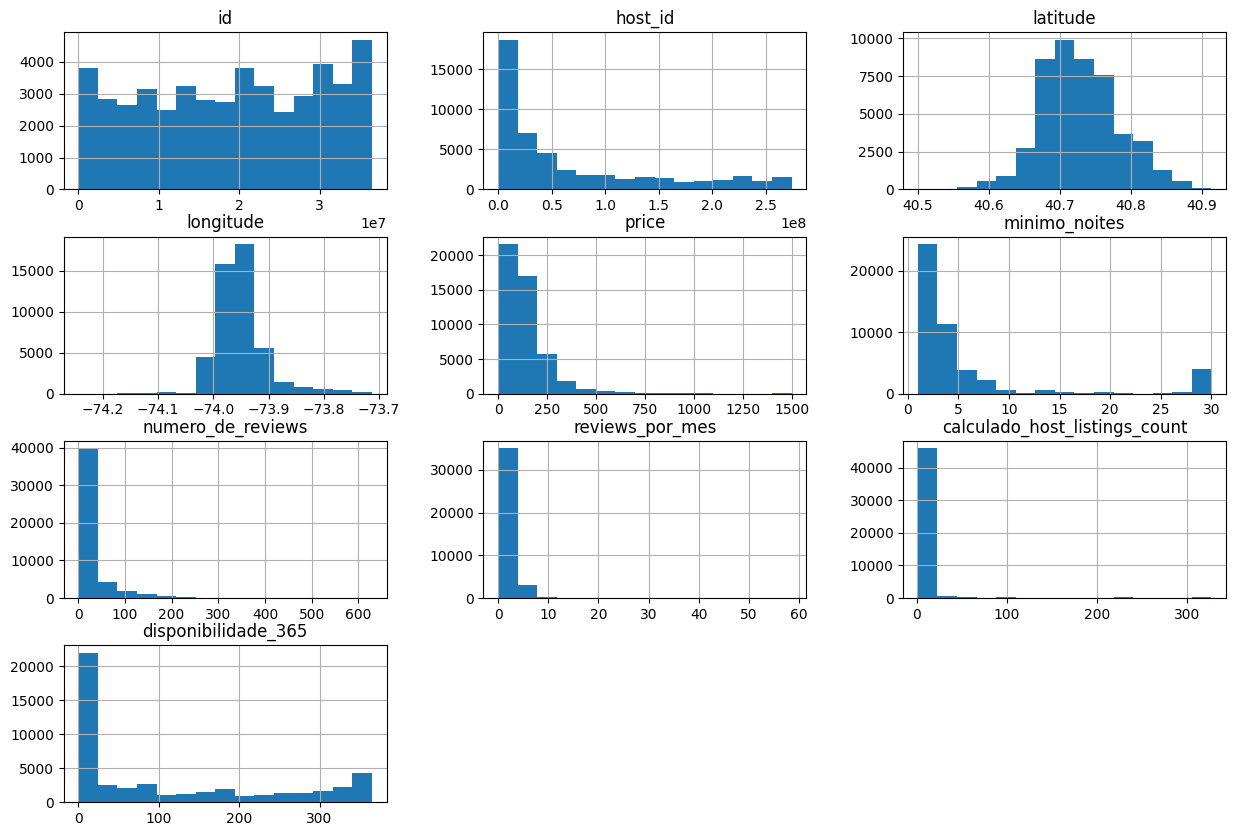

In [24]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### *Avaliando a correlação entre as variáveis*

Para identificar as correlações existentes entre as variáveis de interesse, foi realizado:

* Criação de uma matriz de correlação;
* Geração de um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [29]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes',
    'calculado_host_listings_count', 'disponibilidade_365','latitude', 'longitude']].corr()

display(corr)

,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,latitude,longitude
price,1.000000,0.038135,-0.059508,-0.033355,0.116317,0.114566,0.057943,-0.247533
minimo_noites,0.038135,1.000000,-0.148323,-0.216834,0.331997,0.241021,0.043095,-0.102383
numero_de_reviews,-0.059508,-0.148323,1.000000,0.549121,-0.072684,0.178192,-0.014981,0.057774
reviews_por_mes,-0.033355,-0.216834,0.549121,1.000000,-0.009316,0.190886,-0.009124,0.145245
calculado_host_listings_count,0.116317,0.331997,-0.072684,-0.009316,1.000000,0.228184,0.019387,-0.115258
disponibilidade_365,0.114566,0.241021,0.178192,0.190886,0.228184,1.000000,-0.013831,0.087438
latitude,0.057943,0.043095,-0.014981,-0.009124,0.019387,-0.013831,1.000000,0.084174
longitude,-0.247533,-0.102383,0.057774,0.145245,-0.115258,0.087438,0.084174,1.000000


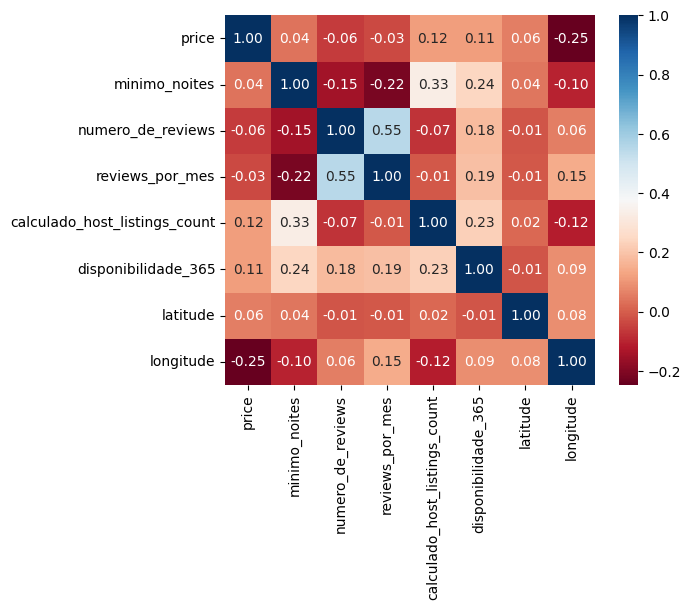

In [28]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Verificando o tipo de imóvel mais alugado na cidade

Esta análise é interessante para demostrar ao cliente qual o tipo de imóvel mais procurado e, assim, qual seria o tipo de imóvel que é considerado como melhor investimento.

> Assim, observando os valores para as porcentagens de cada tipo de imóvel, é possivel ver que o **melhor investimento** seria no tipo ***home/apt***, que é 51,65% dos imóveis disponíveis para aluguel.

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    24806
Private room       22079
Shared room         1142
Name: room_type, dtype: int64

In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.516501
Private room       0.459721
Shared room        0.023778
Name: room_type, dtype: float64

### Verificando quais são os bairros que possuem o maior preço de aluguel.

In [32]:
df_clean.groupby(['bairro']).price.mean().sort_values(ascending=False)[:10]

bairro
Fort Wadsworth       800.000000
Woodrow              700.000000
Sea Gate             487.857143
Prince's Bay         409.500000
Tribeca              368.623529
Flatiron District    303.753247
NoHo                 276.246753
Neponsit             274.666667
Midtown              272.928100
SoHo                 269.131429
Name: price, dtype: float64

In [34]:
df_clean.groupby(['bairro_group']).price.mean().sort_values(ascending=False)[:10]

bairro_group
Manhattan        182.835855
Brooklyn         118.872414
Staten Island    102.078804
Queens            96.160663
Bronx             85.482823
Name: price, dtype: float64

In [35]:
# ver quantidade de imóveis no Fort Wadsworth - Staten Island
print(df_clean[df_clean.bairro == "Fort Wadsworth "].shape)

# ver quantidade de imóveis no Woodrow - Staten Island
print(df_clean[df_clean.bairro == "Woodrow  "].shape)

# ver quantidade de imóveis no Prince's Bay - Staten Island
print(df_clean[df_clean.bairro == "Prince's Bay"].shape)

# ver quantidade de imóveis no Sea Gate - Brooklyn
print(df_clean[df_clean.bairro == "Sea Gate"].shape)

# ver quantidade de imóveis no Tribeca  - Manhattan
print(df_clean[df_clean.bairro == "Tribeca"].shape)

(0, 16)
(0, 16)
(4, 16)
(7, 16)
(170, 16)


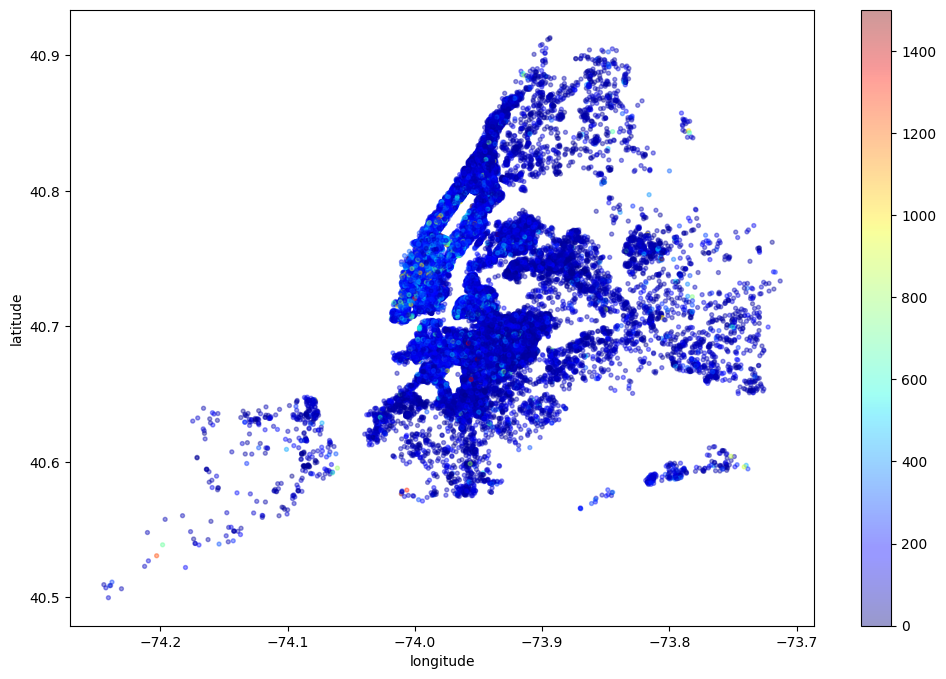

In [36]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# **PASSO 02**

* (A) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
  > Três regiões de Nova York possuem grandes possibilidades de investimento em um imóvel visando aluguéis, são elas: Manhattan, Brooklyn e Staten Island.

  > As regiões de Manhattan e Brooklyn concentram uma grande parte dos imóveis para alugar na cidade, sendo os bairros de Tribeca (Manhattan) e Sea Gate (Brooklyn) listados entre os bairros com maiores aluguéis. Logo, estas seriam boas regiões para investir. Entretanto, é necessário considerar que são regiões de alta concorrência.

  > Outra região com preços de aluguéis mais altos é a região de Staten Island que possui os bairros de Fort Wadsworth, Woodrowe e Prince's Bay entre os bairros com aluguéis maiores. Nesta região a concorrência seria um pouco menor quando comparado as regiões de Manhattan e Brooklyn. Logo, nestas regiões os valores de aluguéis são ainda maiores que nas outras duas, podendo assim, serem também escolhidas para investimento.

* (B) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
  > Analisando a matriz de correlação e o heatmap verifica-se que os valores para o coeficiente de correlação encontrados entre os pares de variáveis (`minimo_noites` x  `price`)  e  (`price` x `disponibilidade_365`), foram 0,038 e 0,114, respectivamente não foram próximos de 1,00.
  Desta forma, pode concluir que estas variáveis não estão bem correlacionadas entre si, demostrando que o número mínimo de noites e a disponibilidade não interferem de forma substancial no preço dos aluguéis.


* (C) Existe algum padrão no texto do nome do local para lugares de mais alto valor?
> Não foi itendificado nehum padrão quanto ao texto do nome do local para lugares de mais alto valor. Porém, ao analisar onde estão localizados estes bairros, percebe-se que todos estes fazem parte de regiões costeiras.


# **PASSO 03**

### Importando pacotes a serem utilizados

In [42]:
# pacotes utilizados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

### Carregamento e pré-processamento dos dados

In [47]:
# Carregar os dados do Airbnb
dados_airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desafio-lighthouse-indicium/teste_indicium_precificacao.csv')

In [48]:
# Remover linhas com valores NaN
dados_airbnb.dropna(subset=['latitude', 'longitude', 'room_type', 'price'], inplace=True)

### Modelagem dos dados - Modelos:
* Árvore de decisão
* Rede Neural Recorrente - RNN

In [49]:
# Definir as variáveis preditoras
X = dados_airbnb[['latitude', 'longitude', 'room_type']]

# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Definir a variável target
y = dados_airbnb['price']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados para a rede neural
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Avaliar o modelo de Árvore de Decisão
tree_predictions = tree_model.predict(X_test)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
print("RMSE da Árvore de Decisão:", tree_rmse)

# Construir e treinar o modelo de RNN
rnn_model = Sequential()
rnn_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
rnn_model.add(LSTM(units=50))
rnn_model.add(Dense(units=1))

# Compilar o modelo de RNN
rnn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Reshape dos dados para a entrada da RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Treinar o modelo de RNN
rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=32)

# Avaliar o modelo de RNN
rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_rmse = mean_squared_error(y_test, rnn_predictions, squared=False)
print("RMSE da RNN:", rnn_rmse)


RMSE da Árvore de Decisão: 287.9642020010715
Epoch 1/100
1223/1223 [==============================] - 15s 9ms/step - loss: 73071.2422
Epoch 2/100
1223/1223 [==============================] - 11s 9ms/step - loss: 64166.8672
Epoch 3/100
1223/1223 [==============================] - 10s 8ms/step - loss: 60738.6328
Epoch 4/100
1223/1223 [==============================] - 10s 8ms/step - loss: 59777.0703
Epoch 5/100
1223/1223 [==============================] - 11s 9ms/step - loss: 59496.4766
Epoch 6/100
1223/1223 [==============================] - 11s 9ms/step - loss: 58919.7148
Epoch 7/100
1223/1223 [==============================] - 10s 8ms/step - loss: 57719.1797
Epoch 8/100
1223/1223 [==============================] - 10s 9ms/step - loss: 57238.5039
Epoch 9/100
1223/1223 [==============================] - 11s 9ms/step - loss: 55855.4023
Epoch 10/100
1223/1223 [==============================] - 11s 9ms/step - loss: 54725.9570
Epoch 11/100
1223/1223 [==============================] - 9s 8ms

### Cálculos de outras métricas importantes:
* MAE - Mean Absolute Error (Erro absoluto médio)
* R-quadrado (coeficiente de determinação)

> R-quadrado da Árvore de Decisão: -0.6615890769711412

> MAE da Árvore de Decisão: 88.89324061765006

> R-quadrado da RNN: 0.10238371181213313

> MAE da RNN: 65.84909950164287

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calcular R-quadrado para Árvore de Decisão
tree_r2 = r2_score(y_test, tree_predictions)
print("R-quadrado da Árvore de Decisão:", tree_r2)

# Calcular MAE para Árvore de Decisão
tree_mae = mean_absolute_error(y_test, tree_predictions)
print("MAE da Árvore de Decisão:", tree_mae)

# Calcular R-quadrado para RNN
rnn_r2 = r2_score(y_test, rnn_predictions)
print("R-quadrado da RNN:", rnn_r2)

# Calcular MAE para RNN
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
print("MAE da RNN:", rnn_mae)


R-quadrado da Árvore de Decisão: -0.6615890769711412
MAE da Árvore de Decisão: 88.89324061765006
R-quadrado da RNN: 0.10238371181213313
MAE da RNN: 65.84909950164287


### Como foi implementada a previsão do preço a partir dos dados.

A implemenração da previsão foi realizada a partir do arquivo CSV fornecido e seguiu os seguintes passos:


1. Carregando os dados do arquivo CSV:

  Nesta etapa, os dados do Airbnb são carregados a partir de um arquivo CSV. Isso geralmente é feito usando bibliotecas como pandas em Python.

2. Seleção das variáveis relevantes:

  Na análise de dados, é crucial selecionar as variáveis que são mais relevantes para o problema em questão. No código fornecido, são selecionadas as variáveis 'latitude', 'longitude' e 'room_type', que são consideradas importantes para prever os preços de aluguéis.

3. Pré-processamento dos dados:

  O pré-processamento dos dados é uma etapa crítica na construção de modelos de machine learning. Aqui, as variáveis categóricas, como 'room_type', são convertidas em variáveis dummy (ou one-hot encoding) para que possam ser utilizadas em algoritmos de aprendizado de máquina.

4. Divisão dos dados em conjuntos de treino e teste:

  Após o pré-processamento, os dados são divididos em conjuntos de treino e teste. O conjunto de treinamento é usado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos.

5. Treinamento do modelo de Árvore de Decisão:

  O modelo de Árvore de Decisão é treinado utilizando os dados de treinamento. Durante o treinamento, o modelo aprende a tomar decisões com base nas características dos dados para prever os preços de aluguéis.

6. Avaliação do desempenho do modelo de Árvore de Decisão:

  O desempenho do modelo de Árvore de Decisão é avaliado utilizando a métrica de RMSE (Root Mean Squared Error). O RMSE é uma medida da diferença entre os valores observados e os valores previstos pelo modelo.

7. Construção e treinamento do modelo de RNN:

  Um modelo de Rede Neural Recorrente (RNN) é construído e treinado usando a biblioteca Keras. As RNNs são adequadas para lidar com sequências de dados, como séries temporais, devido à sua capacidade de capturar dependências temporais.

8. Avaliação do desempenho do modelo de RNN:

  Assim como o modelo de Árvore de Decisão, o desempenho do modelo de RNN é avaliado usando a métrica de RMSE. Isso permite comparar o desempenho dos dois modelos e determinar qual deles é mais adequado para prever os preços de aluguéis.

9. Cálculos de outras métricas importantes:
  * MAE - Mean Absolute Error (Erro absoluto médio)
  * R-quadrado (coeficiente de determinação)

### Quais variáveis e/ou suas transformações foram utilizadas:


1. Latitude e Longitude:

  As variáveis de latitude e longitude são importantes porque representam a localização geográfica de cada anúncio. A localização tem um impacto significativo no preço do aluguel, pois, como vimos na análise exploratória de dados, conforme a lacalização do imóvel o valor do aluguel podertia ser mais alto.

2. Room_type:

  A variável 'room_type' é crucial, pois indica o tipo de espaço disponível para aluguel (por exemplo, apartamento inteiro, quarto privado, quarto compartilhado). O tipo de espaço pode influenciar substancialmente o preço do aluguel, uma vez que diferentes tipos de espaços oferecem diferentes níveis de privacidade e comodidades.

As transformações aplicadas foram:

1. Variáveis Dummy:

A variável categórica 'room_type' foi convertida em variáveis dummy utilizando a função pd.get_dummies(). Isso é essencial para que os algoritmos de aprendizado de máquina possam processar essas informações categóricas. As variáveis dummy representam cada categoria da variável original como uma nova coluna binária (0 ou 1). Isso permite que o modelo aprenda a influência de cada categoria na variável de destino.

2. Normalização:

Os dados foram normalizados antes de serem alimentados na rede neural. A normalização é uma prática comum em redes neurais, onde os dados são ajustados para que tenham uma média de zero e um desvio padrão de um. Isso ajuda a acelerar o treinamento e evitar problemas relacionados a diferentes escalas das variáveis.

Essas variáveis e transformações foram escolhidas porque são consideradas relevantes para a predição de preços de aluguéis. A latitude, longitude e o tipo de quarto são fatores que têm uma relação direta com o preço do aluguel e são informações essenciais para construir um modelo de previsão preciso.

### Tipo de problema resolvido

O problema resolvido foi um problema de **regressão**. A regressão é um tipo de problema de aprendizado supervisionado que, tem como objetivo prever um valor numérico com base em um conjunto de variáveis de entrada.

Assim, ao prever o preço de aluguéis da cidade de Nova York, que é uma variável numérica contínua, estamos lidando com um problema de regressão, onde queremos prever um valor numérico (o preço do aluguel) com base em várias características dos imóveis listados, como latitude, longitude, e tipo de quarto.

As técnicas e os modelos utilizados foram Árvores de Decisão e Redes Neurais Recorrentes (RNNs), pois são comumente empregados em problemas de regressão para prever valores numéricos com base em características dos dados.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?



**Métricas:**
> RMSE da Árvore de Decisão: 287.9642020010715

> R-quadrado da Árvore de Decisão: -0.6615890769711412

> MAE da Árvore de Decisão: 88.89324061765006

> **RMSE da RNN**: 211.6518409305887

> **R-quadrado da RNN**: 0.10238371181213313

> **MAE da RNN:** 65.84909950164287


RMSE: Quanto menor o valor do RMSE, melhor o desempenho do modelo em fazer previsões precisas;

R-quadrado: Quanto mais próximo de 1, melhor o modelo;

MAE: Menores valores indicam um modelo mais preciso.

Logo, avaliando as métricas para os dois modelos escolhidos conclui-se que o modelo de **Redes Neurais Recorrentes  (RNN) é o melhor** para implementação neste caso.


* Suas vantagens e desvantagens são:

> Vantagens:

1. Capacidade de capturar dependências temporais: As RNNs são particularmente úteis para lidar com dados sequenciais, como séries temporais ou dados de texto, devido à sua capacidade de capturar dependências temporais. Elas podem lembrar informações de observações anteriores e usar essas informações para fazer previsões ou classificações.

2. Flexibilidade: As RNNs são altamente flexíveis e podem ser aplicadas a uma variedade de problemas, incluindo previsão de séries temporais, processamento de linguagem natural, reconhecimento de voz, entre outros.

3. Desempenho em problemas complexos: Em problemas complexos com padrões não-lineares e intrincados, as RNNs podem superar outros métodos de modelagem, oferecendo maior capacidade de capturar relações complexas nos dados.

> Desvantagens:

1. Difícil de treinar: As RNNs podem ser difíceis de treinar devido ao problema do gradiente que tende a se deteriorar ou explodir ao longo do tempo (problema conhecido como vanishing or exploding gradient). Isso pode tornar o treinamento das RNNs lento e instável, especialmente em sequências longas.

2. Sensibilidade à escolha dos hiperparâmetros: O desempenho das RNNs pode depender significativamente da escolha adequada dos hiperparâmetros, como o número de camadas, o tamanho da memória, a taxa de aprendizado, entre outros. A seleção inadequada dos hiperparâmetros pode levar a modelos subótimo ou a problemas de convergência durante o treinamento.

3. Pode ser lenta em sequências longas: As RNNs têm dificuldade em capturar dependências de longo prazo em sequências muito longas. Isso ocorre porque os gradientes podem se tornar muito pequenos ou desaparecer ao longo do tempo, dificultando a aprendizagem de relações de longo prazo.

### Qual medida de performance do modelo foi escolhida e por quê?

> RMSE:
  
  O RMSE (Root Mean Squared Error) é uma métrica comumente utilizada para avaliar a qualidade de um modelo de regressão, como os modelos de previsão de preços de aluguéis que estamos considerando. O RMSE é uma medida da diferença entre os valores observados e os valores previstos pelo modelo, expressa na mesma unidade da variável alvo.

> R-quadrado e MAE:

  Essas métricas fornecem insights adicionais sobre o desempenho dos modelos. O R-quadrado mede a proporção da variabilidade na variável de resposta que é explicada pelo modelo. Quanto mais próximo de 1, melhor o modelo. O MAE mede a média absoluta dos erros entre as previsões e os valores reais. Menores valores indicam um modelo mais preciso.


# **PASSOS 04 e 05**

### Salvando o arquivo pkl

In [62]:
import joblib
rnn_model.save('modelo_rnn.h5')



### Prevendo o preço de um imóvel específico

* Preço previsto do aluguel usando RNN: **$ 282.27**

In [ ]:
# Pacotes utilizados
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [54]:
# Criando um DataFrame com as informações do apartamento
dados_apartamento = pd.DataFrame({
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type_Entire home/apt': [1],
    'room_type_Private room': [0],  # Defina como 0 se não for um quarto privado
    'room_type_Shared room': [0]     # Defina como 0 se não for um quarto compartilhado
})

# Normalização doss dados - RNN
dados_apartamento_scaled = scaler.transform(dados_apartamento)

# Previsão com o modelo de Árvore de Decisão
preco_previsto_tree = tree_model.predict(dados_apartamento)

# Previsão com o modelo de RNN
dados_apartamento_rnn = dados_apartamento_scaled.reshape((dados_apartamento_scaled.shape[0], dados_apartamento_scaled.shape[1], 1))
preco_previsto_rnn = rnn_model.predict(dados_apartamento_rnn)

print("Preço previsto do aluguel usando Árvore de Decisão: $", round(preco_previsto_tree[0], 2))
print("Preço previsto do aluguel usando RNN: $", round(preco_previsto_rnn[0][0], 2))


1/1 [==============================] - 0s 22ms/step
Preço previsto do aluguel usando Árvore de Decisão: $ 225.0
Preço previsto do aluguel usando RNN: $ 282.27
